# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Get the HTML content of the page
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for tr in table.find_all('tr')[1:]:  # Skip the first row, which contains headers
    row_data = [td.text.strip() for td in tr.find_all('td')]  # Clean up excess whitespace
    rows.append(row_data)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

df = pd.DataFrame(rows, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' to integers
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')

# Convert 'min_temp' and 'pressure' to floats
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')


In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()

print(f"There are {unique_months} months on Mars.")

There are 12 months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = df['sol'].nunique()

print(f"There are {unique_sols} sols worth of data.")

There are 1867 sols worth of data.


In [16]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


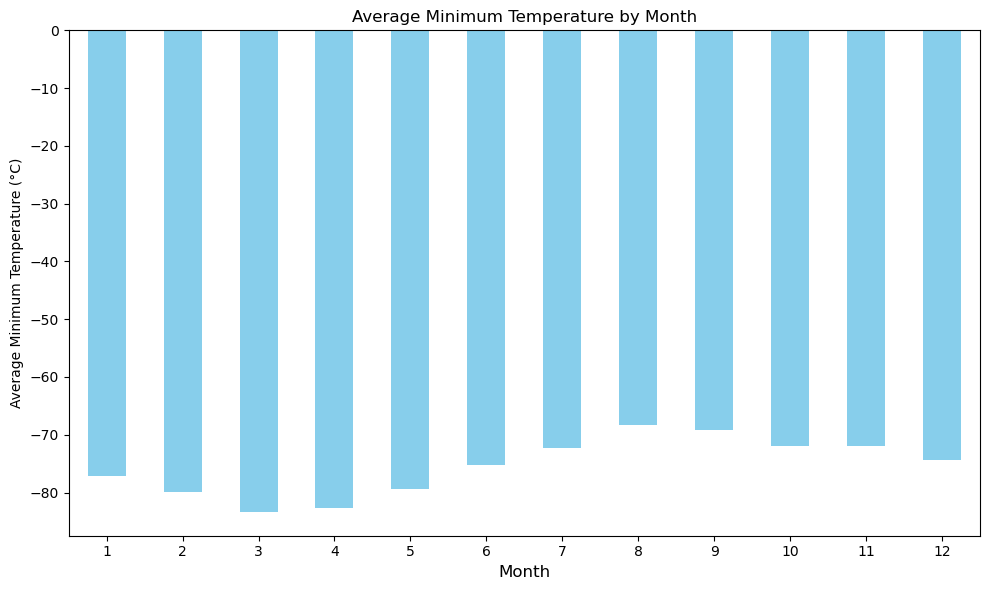

In [17]:
# Plot the average minimum temperature by month

plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)')

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


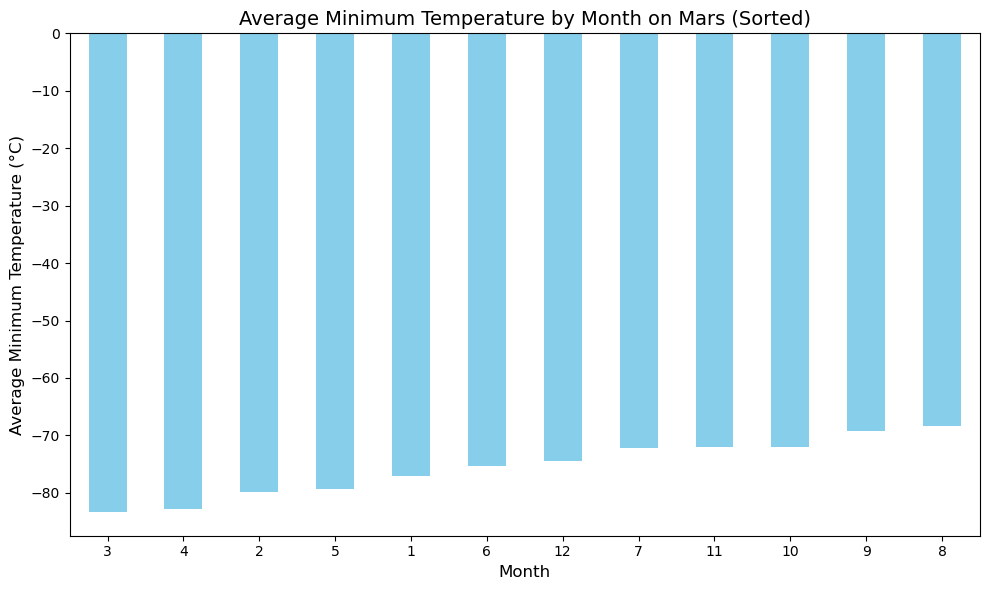

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the months by the average minimum temperature
sorted_min_temp_by_month = average_min_temp_by_month.sort_values()

plt.figure(figsize=(10, 6))
sorted_min_temp_by_month.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Minimum Temperature by Month on Mars (Sorted)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [20]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()

average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

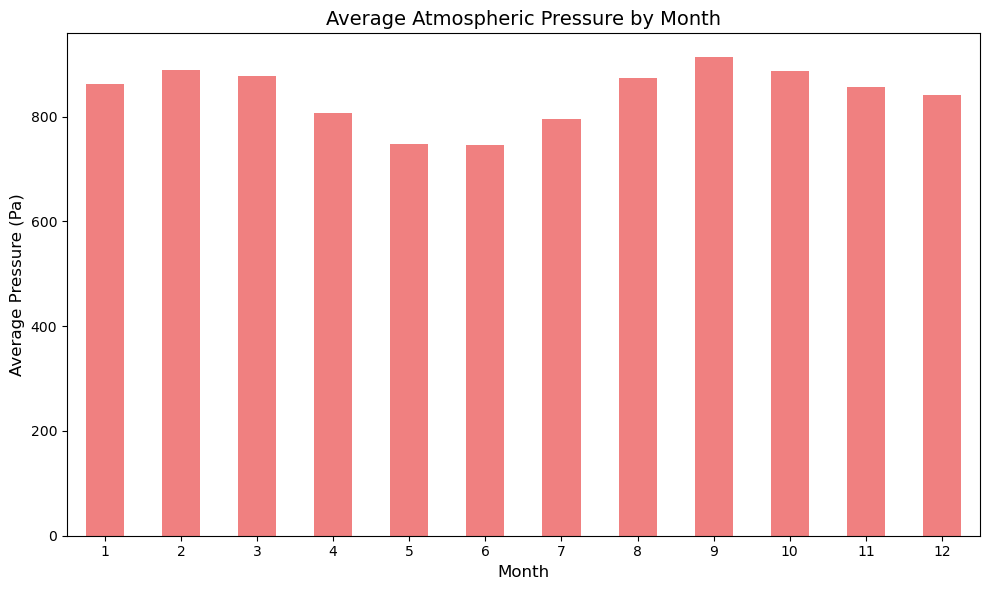

In [21]:
# Plot the average pressure by month

average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Average Atmospheric Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


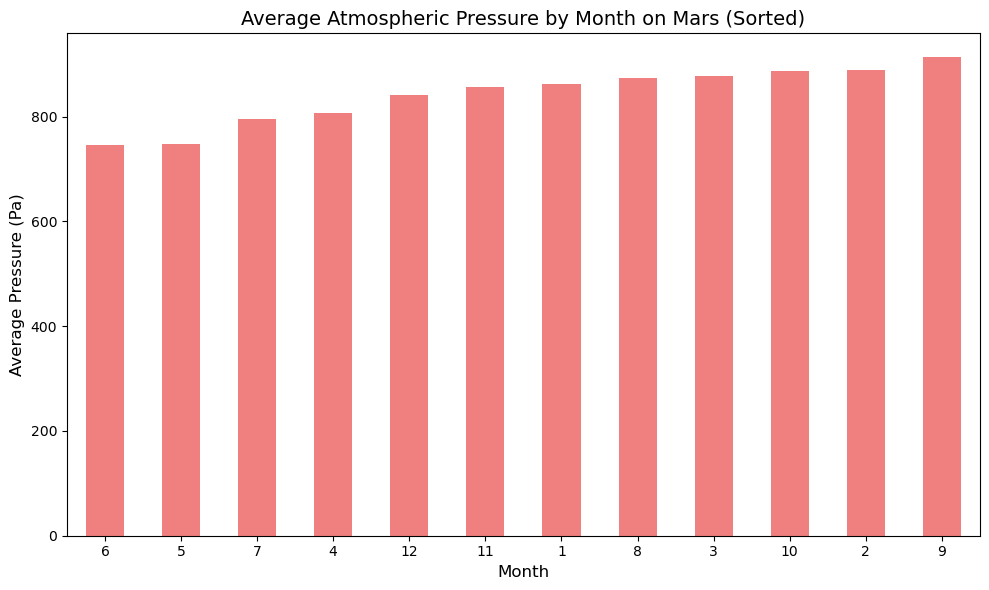

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Group the data by 'month' and calculate the mean of 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the months by the average pressure
sorted_pressure_by_month = average_pressure_by_month.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
sorted_pressure_by_month.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


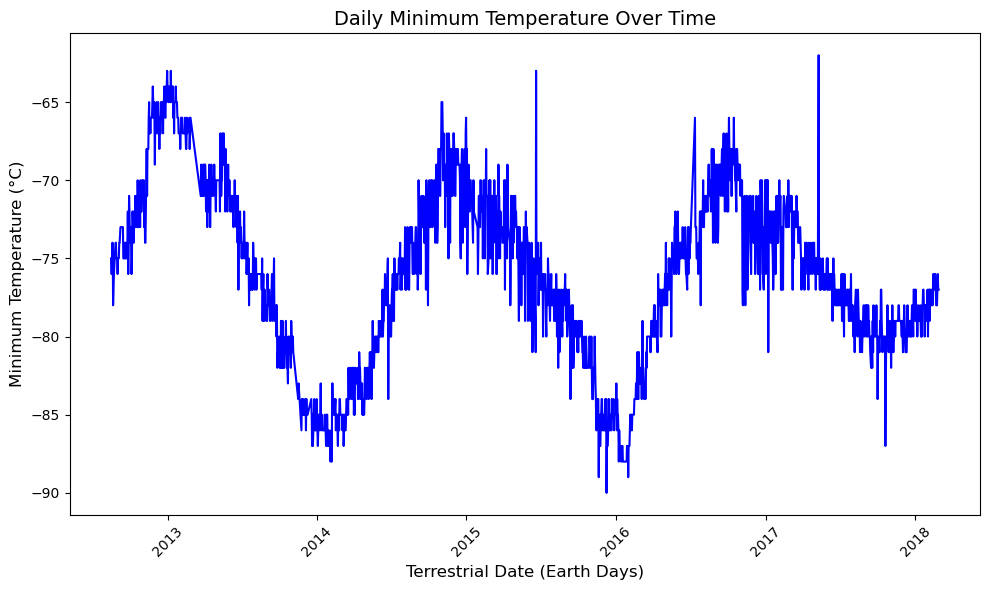

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Ensure 'terrestrial_date' is in datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Plot the daily minimum temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue')

# Add labels and title
plt.title('Daily Minimum Temperature Over Time', fontsize=14)
plt.xlabel('Terrestrial Date (Earth Days)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Minimum Temperature

The minimum temperature data on Mars reflect significant seasonal and daily variations due to the planet's thin atmosphere and distance from the sun. The cold periods are extreme, with temperatures dropping well below -80°C, while the warm periods are slightly more moderate but still far below freezing. The cyclical nature of the temperature variations indicates a Martian year, which is crucial for understanding the planet's climate and planning future exploration missions.

#### Atmospheric Pressure

Low Overall Pressure: The average atmospheric pressure on Mars is much lower than Earth's, reflecting its thin atmosphere. Typical values range around 600 Pascals, which is less than 1% of Earth's atmospheric pressure at sea level (~101,325 Pascals).

Seasonal Fluctuations: The data shows clear seasonal variations in atmospheric pressure, with certain months experiencing higher pressure than others. This is likely due to the movement of carbon dioxide between the polar ice caps and the atmosphere as it sublimates and refreezes.

Coldest Months, Highest Pressure: The months with the lowest temperatures tend to have the highest atmospheric pressure. This is because, during Martian winter, carbon dioxide from the atmosphere freezes at the poles, increasing pressure in other regions.

Impact on Missions: The low and fluctuating atmospheric pressure on Mars would make human survival difficult without pressurized habitats. It also complicates landing spacecraft, which rely on atmospheric drag for descent.

In summary, Mars' atmosphere is extremely thin, with noticeable seasonal pressure changes. These factors are crucial for future exploration, particularly in designing habitats and landing systems.

#### Year Length

Longer than Earth's Year: A Martian year is approximately 687 Earth days, nearly twice as long as a year on Earth. This longer year is due to Mars being farther from the Sun and having a slower orbit.

Seasonal Impact: The extended year results in longer seasons on Mars. Each Martian season lasts nearly twice as long as Earth's, leading to prolonged cold winters and milder summers, which significantly affect temperature and atmospheric conditions.

Temperature Cycles: By plotting daily minimum temperatures, you can observe a clear cyclical pattern that aligns with these longer Martian seasons. The repeated peaks and troughs represent the yearly temperature cycle, allowing you to estimate the year length.

Exploration Challenges: The long Martian year means explorers would have to endure extended periods of harsh winter conditions, which would require well-planned mission timing and resource management to cope with the extreme cold.

In summary, Mars' year is nearly twice as long as Earth's, leading to extended seasons and long-lasting environmental effects that impact temperature and atmospheric pressure cycles. These factors are critical when planning long-term exploration missions.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [26]:
browser.quit()